### Problem 2

**Scenario**: You are building a RAG-based system to analyze customer reviews and classify them as positive or negative. You have a dataset of customer reviews stored in a CSV file, along with their sentiment labels (positive or negative). Here's your task:

1. Load the customer review data from the CSV file using Pandas.
2. Preprocess the review text by converting it to lowercase and removing punctuation.
3. Calculate the average word count for positive and negative reviews.
4. Visualize the distribution of word count for positive and negative reviews using Matplotlib
5. Plot a positive review and observe it should be near the positive sentiments clusters

**Dataset:**

[**Customer Review**](https://docs.google.com/spreadsheets/d/1C0YjGQ-SONdXS-fqmrNe3Uus5xS3e91izsZFxZN5doA/edit?usp=sharing)

---

#### Importing Required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#### 1. Load the customer review data from the CSV file using Pandas.

In [3]:
cr_df = pd.read_csv("./datasets/Customer Review.csv") 
cr_df.head()

,Review,Sentiment
0,"""This product is amazing! It works exactly as ...",positive
1,"""This product is a complete waste of money. It...",negative
2,"""The product is okay, but it could be better. ...",neutral
3,"""I love this product! It's so cute and stylish...",positive
4,"""The product arrived broken. I am very unhappy...",negative


In [4]:
cr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     23 non-null     object
 1   Sentiment  23 non-null     object
dtypes: object(2)
memory usage: 496.0+ bytes


#### 2. Preprocess the review text by converting it to lowercase and removing punctuation.

In [5]:
import string

def processing_the_customers_reviews(review):
    review = review.lower() 
    translator = str.maketrans('', '', string.punctuation)
    review = review.translate(translator)
    return review

In [6]:
cr_df['Review'] = cr_df['Review'].apply(processing_the_customers_reviews) 

In [7]:
cr_df.head()

,Review,Sentiment
0,this product is amazing it works exactly as ad...,positive
1,this product is a complete waste of money it d...,negative
2,the product is okay but it could be better the...,neutral
3,i love this product its so cute and stylish iv...,positive
4,the product arrived broken i am very unhappy w...,negative


#### 3. Calculate the average word count for positive and negative reviews.

In [8]:
cr_df['WordCount'] = cr_df['Review'].apply(lambda review : len(review.split()))
cr_df.head()

,Review,Sentiment,WordCount
0,this product is amazing it works exactly as ad...,positive,24
1,this product is a complete waste of money it d...,negative,21
2,the product is okay but it could be better the...,neutral,30
3,i love this product its so cute and stylish iv...,positive,16
4,the product arrived broken i am very unhappy w...,negative,22


In [9]:
pd.DataFrame(cr_df.groupby('Sentiment')['WordCount'].mean())

,WordCount
Sentiment,
negative,16.125000
neutral,18.285714
positive,16.000000


In [10]:
avg_word_count = pd.DataFrame(cr_df[cr_df['Sentiment'].isin(['positive','negative'])].groupby('Sentiment')['WordCount'].mean())
avg_word_count

,WordCount
Sentiment,
negative,16.125
positive,16.000


#### 4. Visualize the distribution of word count for positive and negative reviews using Matplotlib

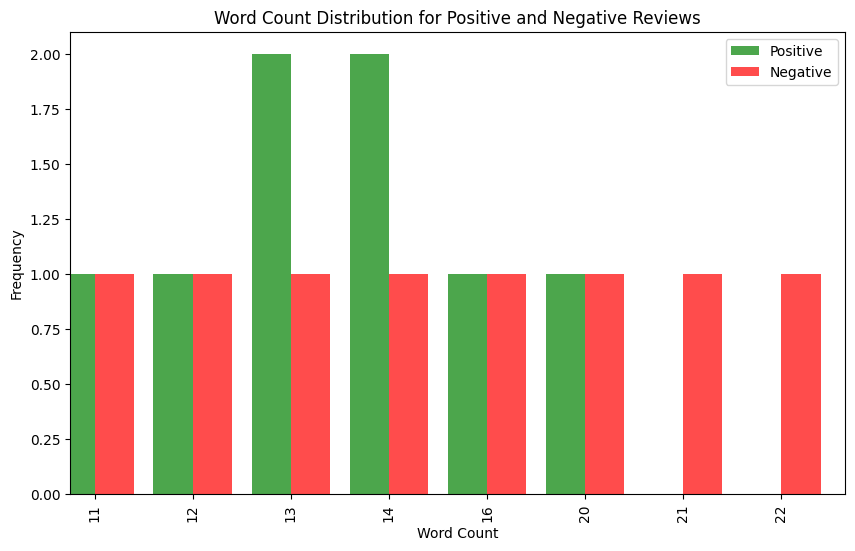

In [11]:
filtered_df = cr_df[cr_df['Sentiment'].isin(['positive', 'negative'])]
positive_reviews = filtered_df[filtered_df['Sentiment'] == 'positive']['WordCount']
negative_reviews = filtered_df[filtered_df['Sentiment'] == 'negative']['WordCount']

plt.figure(figsize=(10, 6))

# For positive reviews
positive_reviews.value_counts().sort_index().plot(
    kind='bar', alpha=0.7, width=0.4, position=1, color='green', label='Positive')

# For negative reviews
negative_reviews.value_counts().sort_index().plot(
    kind='bar', alpha=0.7, width=0.4, position=0, color='red', label='Negative')

# Title and labels
plt.title('Word Count Distribution for Positive and Negative Reviews')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

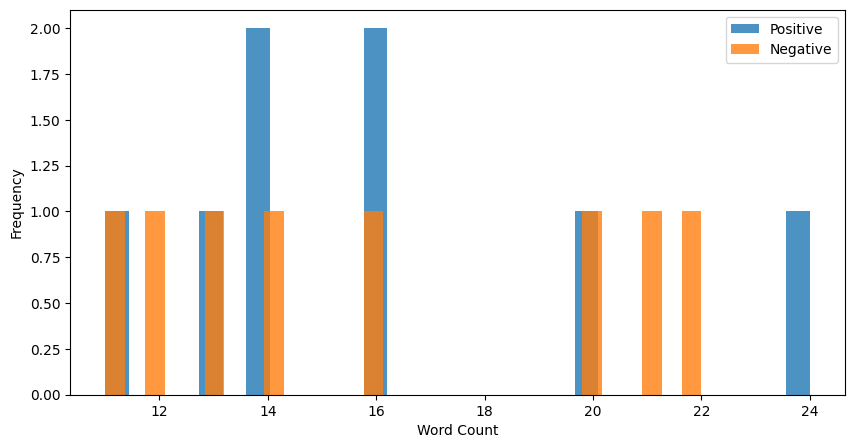

In [12]:
plt.figure(figsize=(10, 5))
plt.hist(positive_reviews, bins=30, alpha=0.8, label='Positive')
plt.hist(negative_reviews, bins=30, alpha=0.8, label='Negative')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()

#### 5. Plot a positive review and observe it should be near the positive sentiments clusters

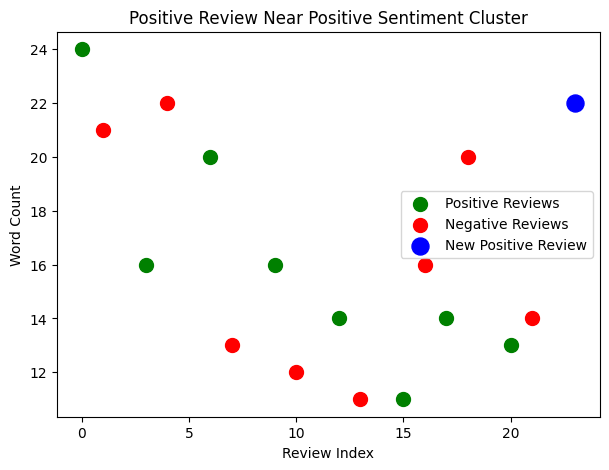

In [ ]:
import matplotlib.pyplot as plt

# Create the figure
plt.figure(figsize=(7, 5))

# Scatter plot for positive and negative reviews
plt.scatter(positive_reviews.index, positive_reviews, color='green', label='Positive Reviews', s=100)
plt.scatter(negative_reviews.index, negative_reviews, color='red', label='Negative Reviews', s=100)

# New positive review sentence
new_positive_review = "This product has changed my life! It’s so simple, and it does exactly what I needed. I’m extremely satisfied with my purchase."
new_positive_word_count = len(new_positive_review.split())

# Assuming this review is similar to other positive reviews
plt.scatter([len(cr_df)], [new_positive_word_count], color='blue', label='New Positive Review', s=150)

# Adding labels, title, and legend
plt.xlabel('Review Index')
plt.ylabel('Word Count')
plt.title('Positive Review Near Positive Sentiment Cluster')
plt.legend()

# Show the plot
plt.show()